In [1]:
"""
Purpose: To Run the proofreading of neurons in the 
test set and measure the precision and recall of the new rules



"""

'\nPurpose: To Run the proofreading of neurons in the \ntest set and measure the precision and recall of the new rules\n\n\n\n'

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import datajoint as dj
import trimesh
from tqdm.notebook import tqdm
from pathlib import Path

from os import sys
sys.path.append("/meshAfterParty/")
sys.path.append("/meshAfterParty/meshAfterParty")

import datajoint_utils as du
from importlib import reload

INFO - 2021-04-25 19:38:23,385 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 19:38:23,387 - settings - Setting database.user to celiib
INFO - 2021-04-25 19:38:23,387 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 19:38:23,392 - settings - Setting stores to {'minnie65': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65', 'stage': '/mnt/dj-stor01/platinum/minnie65'}, 'meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/meshes'}, 'decimated_meshes': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes', 'stage': '/mnt/dj-stor01/platinum/minnie65/02/decimated_meshes'}, 'skeletons': {'protocol': 'file', 'location': '/mnt/dj-stor01/platinum/minnie65/02/skeletons'}}
INFO - 2021-04-25 19:38:23,393 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 19:38:23,406 - connection - Connect

Connecting celiib@at-database.ad.bcm.edu:3306


INFO - 2021-04-25 19:38:23,811 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 19:38:23,815 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 19:38:23,817 - settings - Setting database.user to celiib
INFO - 2021-04-25 19:38:23,818 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 19:38:23,819 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 19:38:23,820 - settings - Setting database.user to celiib
INFO - 2021-04-25 19:38:23,821 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 19:38:23,823 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 19:38:24,240 - settings - Setting enable_python_native_blobs to True


In [4]:
#configuring will include the adapters
minnie,schema = du.configure_minnie_vm()

INFO - 2021-04-25 19:38:24,364 - settings - Setting database.host to at-database.ad.bcm.edu
INFO - 2021-04-25 19:38:24,366 - settings - Setting database.user to celiib
INFO - 2021-04-25 19:38:24,366 - settings - Setting database.password to newceliipass
INFO - 2021-04-25 19:38:24,367 - settings - Setting enable_python_native_blobs to True
INFO - 2021-04-25 19:38:24,874 - settings - Setting enable_python_native_blobs to True


In [5]:
import validation_utils as vu
import neuron_visualizations as nviz
import neuron_utils as nru
import proofreading_utils as pru
import time
import system_utils as su

# Runnig the validation

In [6]:
"""
Psueodocode: 
1) Pull down the segment ids of the valid neurons

For each neuron
1) Dwonload the neuron object
2) Run the Proofreading
3) Print out the validation plot
4) Save the validation df

"""

'\nPsueodocode: \n1) Pull down the segment ids of the valid neurons\n\nFor each neuron\n1) Dwonload the neuron object\n2) Run the Proofreading\n3) Print out the validation plot\n4) Save the validation df\n\n'

In [7]:
segment_ids = minnie.AutoProofreadValidationBorderNeurons().fetch("segment_id")

In [8]:
job_idx = 2
job_step = 5
segments_to_process = segment_ids[job_idx*job_step:(job_idx+1)*job_step]
segments_to_process

array([864691136008425132, 864691135865518469, 864691135945413668,
       864691136003930314, 864691136194042326])


--- Working on Neuron 864691136008425132 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [448259.32162313 929180.42227274 595240.52885951]--------
coordinate [448259.32162313 929180.42227274 595240.52885951] had error branches []--------


 ----- Working on coordinate [454872.55702616 942312.43796309 625067.76186852]--------
coordinate [454872.55702616 942312.43796309 625067.76186852] had error branches []--------


 ----- Working on coordinate [455453.60028452 951632.94334923 635549.81113486]--------
coordinate [455453.60028452 951632.94334923 635549.81113486] had error branches []--------


 ----- Working on coordinate [455889.24925506 955155.01994705 639144.98788184]--------
coordinate [455889.24925506 955155.01994705 639144.98788184] had error branches []--------


 ----- Working on coordinate [478847.86051971 974988.29505019 662321.9266523 ]--------
coordinate [478847.86051971 974988.29505019 662321.9266523 ] had error branches []------

coordinate [ 735146.83035753 1053997.80795109  758252.41870128] had error branches [385 406]--------


 ----- Working on coordinate [ 735214.40840092 1032909.69488774  762241.46162826]--------
coordinate [ 735214.40840092 1032909.69488774  762241.46162826] had error branches [392 393]--------


 ----- Working on coordinate [ 735472.1 1060708.   741313. ]--------
coordinate [ 735472.1 1060708.   741313. ] had error branches [394 401]--------


 ----- Working on coordinate [ 735935.79780767 1036457.14708559  767442.7263705 ]--------
coordinate [ 735935.79780767 1036457.14708559  767442.7263705 ] had error branches [411 350]--------


 ----- Working on coordinate [ 737929.11632905 1061032.38485557  741972.46254292]--------
coordinate [ 737929.11632905 1061032.38485557  741972.46254292] had error branches [413 414 422]--------


 ----- Working on coordinate [ 743723.27287162 1027773.62079585  746818.79927073]--------
coordinate [ 743723.27287162 1027773.62079585  746818.79927073] had error

coordinate [1001324.93627498 1032618.85085491  968020.22934127] had error branches []--------


 ----- Working on coordinate [1072189.42254292 1030478.39921726  985217.98993435]--------
coordinate [1072189.42254292 1030478.39921726  985217.98993435] had error branches [818 819 820 821 823]--------


 ----- Working on coordinate [1074800.39940646 1028876.96386632  990100.00857697]--------
coordinate [1074800.39940646 1028876.96386632  990100.00857697] had error branches [827 822]--------


 ----- Working on coordinate [1076406.4584076  1029674.47418737  987266.80396768]--------
coordinate [1076406.4584076  1029674.47418737  987266.80396768] had error branches [828 829 830]--------


 ----- Working on coordinate [1229949.86380847  408756.55592033  889384.70445727]--------
coordinate [1229949.86380847  408756.55592033  889384.70445727] had error branches [863 859]--------


 ----- Working on coordinate [1249478.10607234  732369.21926256  743524.15857218]--------
coordinate [1249478.106072

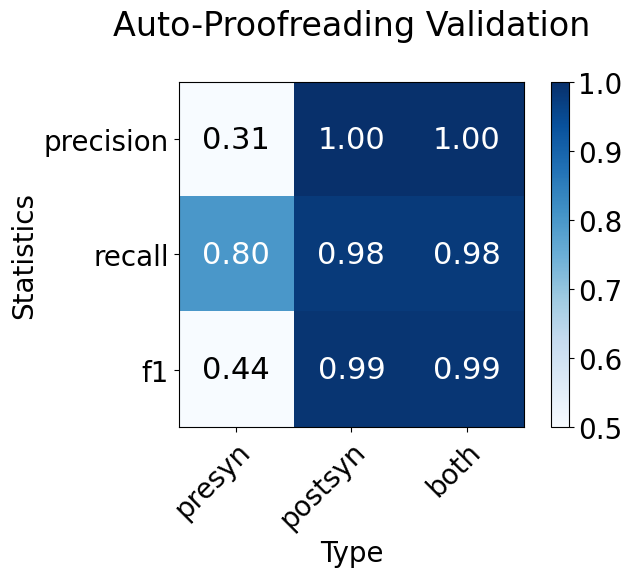

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136008425132_validation_df.pbz2
File size is 0.076714 MB
Total time for neuron 864691136008425132: 1068.1586372852325

--- Working on Neuron 864691135865518469 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1313143.   484061.3  758780.6]--------
coordinate [1313143.   484061.3  758780.6] had error branches []--------
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 89, # error presyns = 17
For postsyn: # valid synapses = 5158, # error synapses  = 16, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 5263
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 89
n_valid_syn_ids_postsyn = 5158
n_errored_syn_ids_postsyn = 16
Segment Id = 86469113

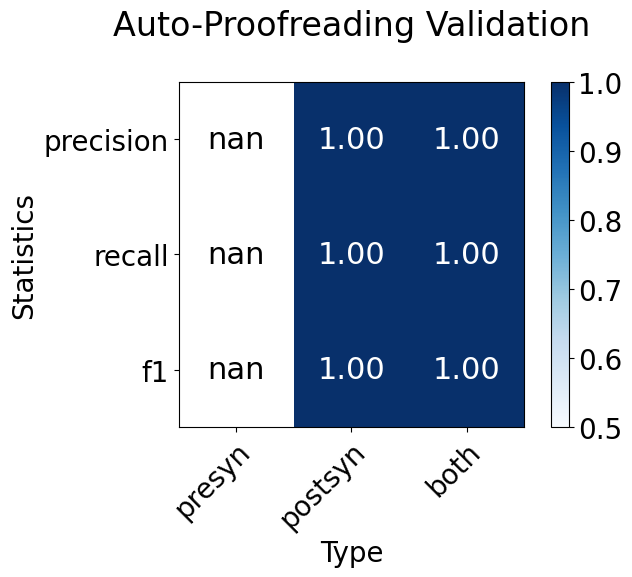

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135865518469_validation_df.pbz2
File size is 0.105265 MB
Total time for neuron 864691135865518469: 93.93968057632446

--- Working on Neuron 864691135945413668 --
Decompressing Neuron in minimal output mode...please wait
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
limb_branch_dict_to_cancel = {}
Apply the presyn non_error
For presyn: # valid synapses = 0, # error synapses  = 108, # error presyns = 9
For postsyn: # valid synapses = 1536, # error synapses  = 1, # error presyns = 0
Synapsse Results:
Total Number of Synapses = 1645
n_valid_syn_ids_presyn = 0
n_errored_syn_ids_presyn = 108
n_valid_syn_ids_postsyn = 1536
n_errored_syn_ids_postsyn = 1
Segment Id = 864691135945413668
Postsyn counts:
TP:1536
TN:1
FP:0
FN:0
Presyn counts:
TP:0
TN:99
FP:0
FN:0


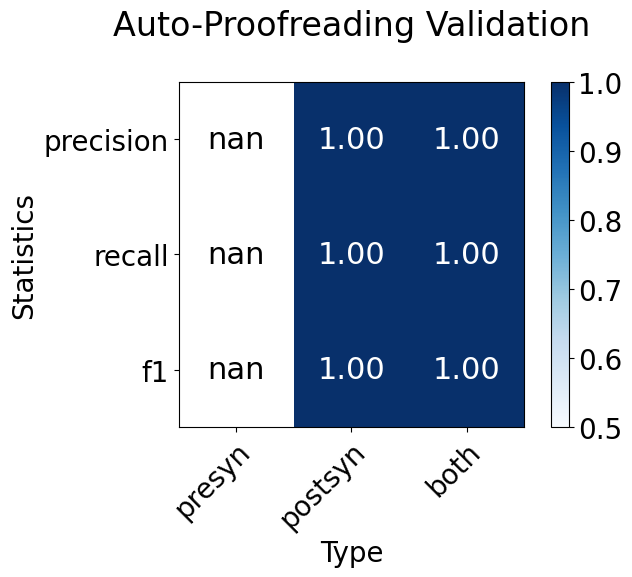

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691135945413668_validation_df.pbz2
File size is 0.03361 MB
Total time for neuron 864691135945413668: 30.725533485412598

--- Working on Neuron 864691136003930314 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [1157985.67029235  865153.97076866  922305.84373053]--------
coordinate [1157985.67029235  865153.97076866  922305.84373053] had error branches []--------


 ----- Working on coordinate [1159164.24612675  836705.0360456   922242.31382708]--------
coordinate [1159164.24612675  836705.0360456   922242.31382708] had error branches [26 29]--------


 ----- Working on coordinate [1169801.94466494  688930.0172062   890937.06013169]--------
coordinate [1169801.94466494  688930.0172062   890937.06013169] had error branches []--------


 ----- Working on coordinate [1172502.717746    944361.17423384  951463.84252249]--------
coordinate [1172502.717746  

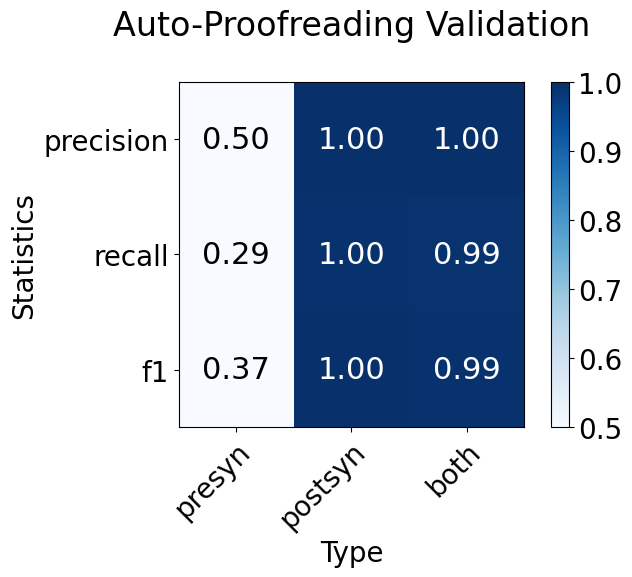

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136003930314_validation_df.pbz2
File size is 0.080909 MB
Total time for neuron 864691136003930314: 127.73604726791382

--- Working on Neuron 864691136194042326 --
Decompressing Neuron in minimal output mode...please wait


 ----- Working on coordinate [633369.46396577 642628.37375774 904286.15810562]--------
coordinate [633369.46396577 642628.37375774 904286.15810562] had error branches []--------


 ----- Working on coordinate [655835.01357908 654071.79933467 886661.69334533]--------
coordinate [655835.01357908 654071.79933467 886661.69334533] had error branches [10 18]--------


 ----- Working on coordinate [703150.15902442 700224.74801046 786377.94326672]--------
coordinate [703150.15902442 700224.74801046 786377.94326672] had error branches [46 44]--------


 ----- Working on coordinate [705796.38338002 711368.54932521 761452.07011226]--------
coordinate [705796.38338002 711368.54932521

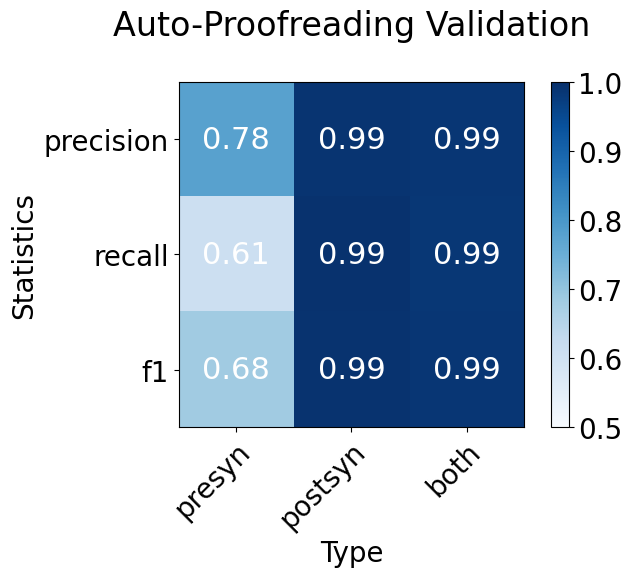

Saved object at /neuron_mesh_tools/Auto_Proofreading/Validation_Testing/v4/validation_data/864691136194042326_validation_df.pbz2
File size is 0.069138 MB
Total time for neuron 864691136194042326: 128.87454557418823


In [9]:
for seg_id in segments_to_process:
    print(f"\n--- Working on Neuron {seg_id} --")
    st = time.time()
    
    
    #1) Dwonload the neuron object
    neuron_obj = du.fetch_neuron_obj_manual(seg_id,
                                       border_validation=True)
    
    (filt_neuron,
     return_synapse_df_revised,
    return_validation_df_revised) =  vu.filtered_neuron_score(neuron_obj = neuron_obj,   
                        filter_list = pru.v4_exc_filters(),
                        plot_limb_branch_filter_with_disconnect_effect = False,
                        verbose = False,
                        plot_score=False)
    
    vu.synapse_validation_df_to_score_plot(return_validation_df_revised)
    
    su.compressed_pickle(return_validation_df_revised,f"./validation_data/{seg_id}_validation_df")
    
    print(f"Total time for neuron {seg_id}: {time.time() - st}")